# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2005 Никитин Степан
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

### Создание матрицы и графа

In [50]:
import copy
import math
import random
import time

import networkx as nx
import matplotlib.pyplot as plt

path_1 = 'adj_matrix.txt'
path_2 = 'negative_adj_matrix.txt'

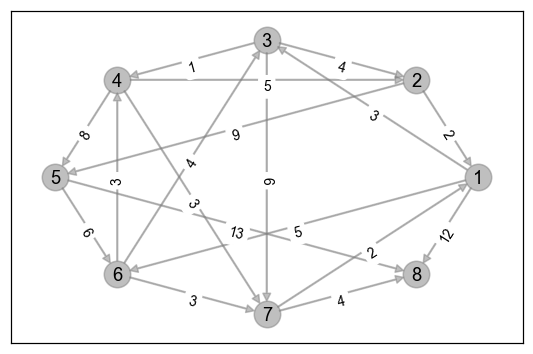

In [51]:
# Из файла
def create_adj_matrix(path):
    matrix = []
    with open(path, 'r') as file:
        for line in file:
            matrix.append(list(map(str, line.replace("\n", "").split(" "))))
            
    for i in matrix:
        for j in range(len(i)):
            if i[j] == 'inf':
                i[j] = math.inf
            else:
                i[j] = int(i[j])
                
    return matrix


# Граф из матрицы
def create_graph(matrix):
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
        
    for line in range(len(matrix)):
        for element in range(len(matrix)):
            if matrix[line][element] != math.inf:
                graph.add_edge(line+1, element+1, weight=matrix[line][element], label=matrix[line][element])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'red'
        
    return graph


# Визуализация графа
def draw_graph(graph, matrix, path = None):
    plt.figure(num=None, figsize=(6, 4), dpi=110)
    
    default_color = 'gray'
    path_color = 'green'
    path_edge = []
    edge_colors = [default_color]
    node_colors = [default_color]
    
    if path:
        edge_colors = []
        node_colors = []
        
        for i in range(len(matrix)):
            if i+1 in path:
                node_colors.append(path_color)
            else:
                node_colors.append(default_color)
                
        for i in range(len(path) - 1):
            path_edge.append((path[i], path[i+1]))
            
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j] != math.inf:
                    if (i+1, j+1) not in path_edge:
                        edge_colors.append(default_color)
                    else:
                        edge_colors.append(path_color)
                        
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = node_colors, node_size = 300, pos = pos, alpha = 0.5)
    nx.draw_networkx_edges(graph,edge_color = edge_colors, pos = pos, arrowstyle = 'simple, tail_width=0.05', alpha = 0.5)
    nx.draw_networkx_labels(graph, pos = pos, font_size = 12, verticalalignment = 'center_baseline', font_family = 'arial')
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels, font_size = 9, verticalalignment = 'top', font_family = 'arial')
    plt.show()


matrix = create_adj_matrix(path_1)
G = create_graph(matrix)
draw_graph(G, matrix)

### Алгоритм Дейкстры

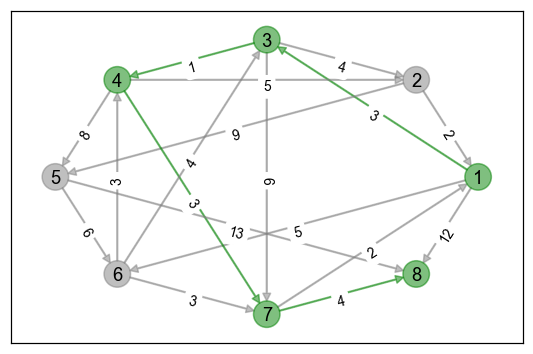

Полученный путь: [1, 3, 4, 7, 8]


In [52]:
# O(n^2 + m)
# Находит кратчайшие пути от одной из вершин графа до всех остальных
# Алгоритм работает только для графов без рёбер отрицательного веса
# На каждом шаге беру ту вершину, расстояние до которой от начальной меньше всего,
# и которую мы до этого не посещали
# Делаем до тех пор, пока не посетим все вершины


def get_link_v(v, D):
    arr = []
    res = []
    for i in range(len(D[v])):
        if D[v][i] != math.inf:
            arr.append([i, D[v][i]])
    arr.sort(key= lambda value: value[1])
    for i in range(len(arr)):
        res.append(arr[i][0])
    return res


def find_min_arg(T, P):
    amin = -1
    m = max(T)                         # Максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in P:
            m = t                      # Минимальное значение
            amin = i                   # Индекс минимального значения
    return amin


def dijkstra(matrix, start, end):
    D = copy.deepcopy(matrix)
    N = len(D)                         # Число вершин в графе
    T = [math.inf] * N                 # Последняя строка таблицы
    M = [math.inf for i in range(N)]   # Оптимальные связи между вершинами
    v = start - 1                      # Стартовая вершина
    P = [v]                            # Просмотренные вершины
    T[v] = 0                           # Нулевой вес для стартовой вершины
    node = end - 1
    path = [end]
    
    while v != -1:
        for j in get_link_v(v, D):     # Перебираем все связанные вершины с вершиной v
            if j not in P:
                w = T[v] + D[v][j]     # Текущий вес: текущее значение + вес дуги
                if w < T[j]:
                    T[j] = w
                    M[j] = v           # Связываем вершину j с вершиной v
                    
        v = find_min_arg(T, P)         # Следующий узел с наименьшим весом
        if v >= 0:
            P.append(v)

    if T[end - 1] == math.inf:
        return None
    else:
        while node != start - 1:
            path.append(M[node]+1)
            node = M[node]
            
    return path[::-1], T[end - 1]



G_dijkstra = copy.copy(G)
matrix = create_adj_matrix(path_1)
path, d = dijkstra(matrix, 1, 8)
draw_graph(G_dijkstra,matrix, path)
print('Полученный путь:', path)

### Алгоритм Флойда-Уоршелла

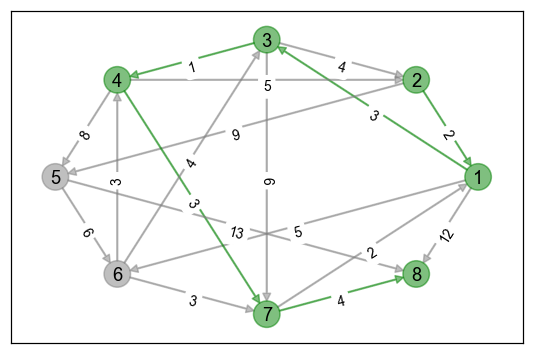

Полученный путь: [2, 1, 3, 4, 7, 8]


In [53]:
# O(n^3)
# Поиск в графе кратчайших путей между любыми парами вершин
# Работает с ребрами с отрицательным весом
# Для каждой i-j вершины смотрим, будет ли путь i-k-j короче


def get_path(P, v, u):
    v -= 1
    u -= 1
    path = [v]
    while v != u:
        v = P[v][u]
        path.append(v)  
    path = [el + 1 for el in path]
    return path


def floyd(matrix, start, end):
    V = copy.deepcopy(matrix)
    N = len(V)                                       # Число вершин в графе 
    P = [[0 for i in range(N)] for j in range(N)]    # Начальный список предыдущих вершин для поиска кратчайших маршрутов
    
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == math.inf and i == j:
                V[i][j] = 0
            else:
                V[i][j] == matrix[i][j]
                
    for i in range(N):
        for j in range(N):
            if V[i][j] != math.inf:
                P[i][j] = j
                
    for i in range(N):
        for j in range(N):
            if i == j: 
                continue
            if V[i][j] != math.inf:
                
                for k in range(N):
                    if i == k or j == k: 
                        continue
                    d = V[i][j] + V[j][k]
                    if V[i][k] > d:
                        V[i][k] = d
                        P[i][k] = P[i][j]             # Номер промежуточной вершины при движении от i к j
                        
    path = get_path(P, start, end)
    return path



G_floyd = copy.copy(G)
matrix = create_adj_matrix(path_1)
path = floyd(matrix, 2, 8)
draw_graph(G_floyd,matrix, path)
print('Полученный путь:', path)

### Алгоритм Беллмана-Форда

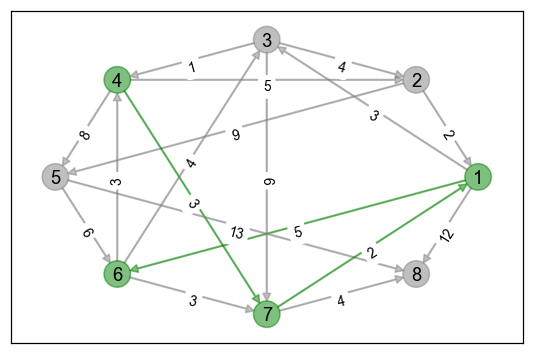

Полученный путь: [4, 7, 1, 6]


In [54]:
# O(n*m) - worst
# O(n) - mid
# Находит кратчайшие пути от одной из вершин графа до всех остальных
# Работает с ребрами с отрицательным весом
# На каждом шаге смотрим как мы можем из этих вершин попасть наиболее оптимально в другие
# Смотрим как из u вершины мы можем наиболее оптимальным способом попасть в v вершину


def get_link_b(v, D):
    arr = []
    res = []
    for i in range(len(D[v])):
        if D[v][i] != math.inf:
            arr.append([i, D[v][i]])
    arr.sort(key= lambda value: value[1])
    
    for i in range(len(arr)):
        res.append(arr[i][0])
    return res


def bellman(matrix, start, end):
    D = copy.copy(matrix)
    N = len(D)                          # Число вершин
    dist = [math.inf] * N               # Последняя строка таблицы
    P = [math.inf for i in range(N)]    # Оптимальные связи между вершинами
    v = start - 1                       # Стартовая вершина
    dist[v] = 0                         # Нулевой вес для стартовой вершины
    node = end - 1
    path = [end]
    check = True

    for i in range(N - 1):
        for v in range(N):
            for u in get_link_b(v, D):
                if dist[u] > dist[v] + D[v][u]:
                    dist[u] = dist[v] + D[v][u]
                    P[u] = v

    for v in range(N):
        for u in get_link_b(v, D):
            if dist[u] > dist[v] + D[v][u]:
                print('В графе найден цикл с отрицательным весом')
                check = False
                break
                
    if check:
        while node != start - 1:
            path.append(P[node]+1)
            node = P[node]

    return path[::-1], dist



G_bellman = copy.copy(G)
matrix = create_adj_matrix(path_1)
path = bellman(matrix, 4, 6)[0]
draw_graph(G_bellman, matrix, path)
print('Полученный путь:', path)

### Алгоритм Джонсона

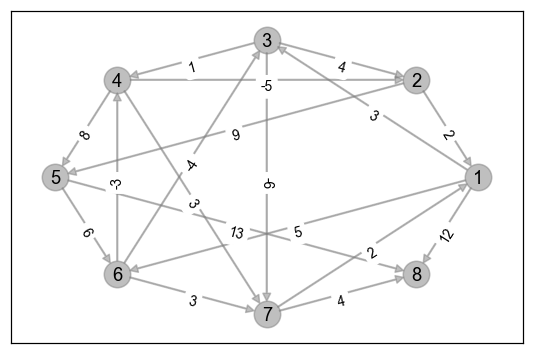

Граф с пересчитанными ребрами:
В графе найден цикл с отрицательным весом
В графе найден цикл с отрицательным весом
В графе найден цикл с отрицательным весом
В графе найден цикл с отрицательным весом


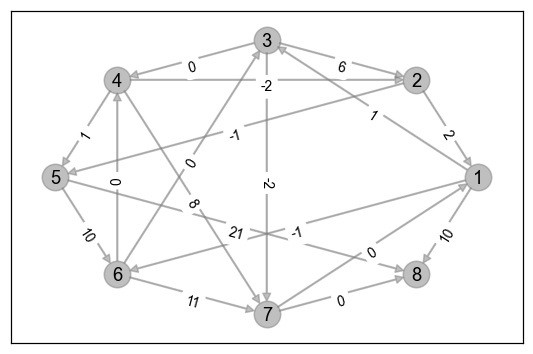

Результат:


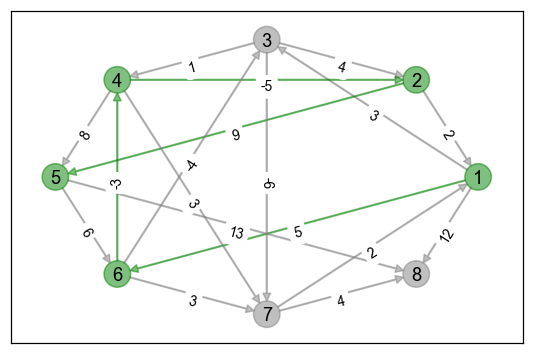

Полученный путь: [1, 6, 4, 2, 5]


In [55]:
# O(n*m * log(n))
# Позволяет найти кратчайшие пути между всеми парами вершин взвешенного ориентированного графа
# Данный алгоритм работает, если в графе содержатся рёбра с положительным или отрицательным весом
# Алгоритм использует вспомогательные алгоритмы Дейкстры и Беллмана-Форда
# Сначала избавляемся от ребер с отрицательным весом
# Добавляем фиктивную вершину, расстояние от которой до каждой вершины ноль
# Затем применяем алгоритм Беллмана-Форда от фиктивной вершины
# Изменяем длину каждой дуги таким образом, чтобы избавиться от отрицательных дуг..
# ..и чтобы все кратчайшие расстояния остались такими же
# Длине каждой дуги XY добавим h(X) и вычтем h(Y), где h(v) – «чистая» функция,..
# ..которая определяет некоторое константное значение для каждой вершины
# Далее удаляем фиктивную вершину и применяем алгоритм Дейкстры для каждой вершины


def jonson(matrix, graph, start, end):
    D = copy.copy(matrix)
    N = len(D)
    j_graph = copy.deepcopy(graph)
    j_graph.add_node(N + 1)
    
    for i in range(1, N + 1):
        j_graph.add_edge(N + 1, i, weight=0, label=0)
    D.append([0] * N)
    
    for i in range(len(D)):
        D[i].append(0)
    N = len(D)
    
    for i in range(N):
        for j in range(len(D[i])):
            if D[i][j] == 0 and ((i + 1, j + 1) not in j_graph.edges):
                D[i][j] = math.inf
                
    h = bellman(D, N, end)[1]
    
    for i in range(N):
        D[i].pop()
    D.pop()
    N = len(D)
    
    for i in range(N):
        for j in get_link_b(i, D):
            D[i][j] = D[i][j] + h[i] - h[j]

    j_graph = create_graph(D)
    draw_graph(j_graph, D)
    path, d = dijkstra(D, start, end)

    return path



matrix = create_adj_matrix(path_2)
G_jonson = create_graph(matrix)
draw_graph(G_jonson, matrix)
print('Граф с пересчитанными ребрами:')
path = jonson(matrix, G_jonson, 1, 5)
print('Результат:')
draw_graph(G_jonson, matrix, path)
print('Полученный путь:', path)

### Алгоритм Левита

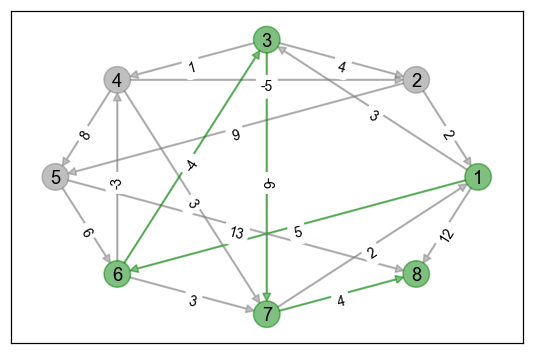

Полученный путь: [1, 6, 3, 7, 8]


In [56]:
# O(n*m)
# Находит кратчайшие пути от одной из вершин графа до всех остальных
# Алгоритм также работает для графов с рёбрами отрицательного веса
# Есть множество обработанных вершин M0
# Множество не обработанных вершин M2
# Множество вершин до которых расстояние еще вычисляется M1, которое делится на множества обычную M1' и срочную M1''


def levit(matrix, start, end):
    D = copy.deepcopy(matrix)
    que_0 = []
    que_1_d = []
    que_1_f = []
    que_2 = []
    que_3 = []
    N = len(D)
    counter = [0] * N
    dist = [math.inf] * N                # Последняя строка таблицы
    v = start - 1                        # Стартовая вершина
    dist[v] = 0                          # Нулевой вес для стартовой вершины
    P = [math.inf for i in range(N)]
    node = end - 1
    path = [end]
    
    for i in range(N):
        if i != v:
            que_2.append(i)
        else:
            que_1_d.append(i)

    while que_1_d or que_1_f:
        if que_1_f:
            u = que_1_f.pop(0)
        else:
            u = que_1_d.pop(0)
            
        for v in get_link_b(u, D):
            if v in que_2:
                que_1_d.append(que_2.pop(que_2.index(v)))
                dist[v] = dist[u] + D[u][v]
                P[v] = u
                
            elif v in que_1_d or v in que_1_f:
                dist[v] = min(dist[v], dist[u] + D[u][v])
                
            elif v in que_0:
                if dist[v] > dist[u] + D[u][v]:
                    dist[v] = dist[u] + D[u][v]
                    P[v] = u
                    que_1_f.append(que_0.pop(que_0.index(v)))
                    counter[v] += 1
                    
        que_0.append(u)
        
        if counter[u] > N + 5:
            que_3.append(que_0.pop(que_0.index(u)))
            
    if end not in que_2:
        while node != start - 1:
            path.append(P[node] + 1)
            node = P[node]

    return path[::-1]



matrix = create_adj_matrix(path_2)
G_levit = create_graph(matrix)
path = levit(matrix, 1, 8)
draw_graph(G_levit, matrix, path)
print('Полученный путь:', path)

### Алгоритм Йена

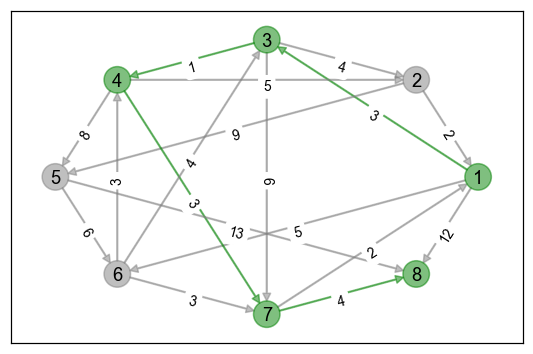

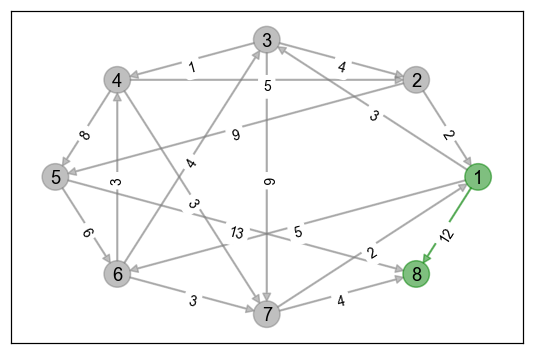

Полученный путь: [([1, 3, 4, 7, 8], 11), ([1, 8], 12)]


In [58]:
# O(k*n * (m+n * log(n))
# Алгоритм находит k коротчайших путей из одной вершины в другую, если они существуют


def yen(matrix, start, end):
    D = copy.deepcopy(matrix)
    global paths
    res = dijkstra(D, start, end)
    
    if res and res not in paths:
        paths.append(res)
        
        for i in range(len(paths[0][0])-1):
            invalid_matrix = copy.deepcopy(D)
            invalid_matrix[paths[0][0][i] - 1][paths[0][0][i + 1] - 1] = math.inf
            yen(invalid_matrix, start, end)

    return paths



matrix = create_adj_matrix(path_1)
G_yen = create_graph(matrix)
paths = []
path = yen(matrix, 1, 8)
path.sort(key=lambda lenght: lenght[1])

for i in path:
    draw_graph(G_yen, matrix, i[0])
print('Полученный путь:', path)